In [ ]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
class ReinforceAgent:
    """
    ReinforceAgent that follows algorithm
    'REINFORCE Monte-Carlo Policy-Gradient Control (episodic)'
    """
    def __init__(self, alpha, gamma):
        # set values such that initial conditions correspond to left-epsilon greedy
        self.theta = np.array([-1.47, 1.47])
        self.alpha = alpha
        self.gamma = gamma
        # first column - left, second - right
        self.x = np.array([[0, 1],
                           [1, 0]])
        self.rewards = []
        self.actions = []

    def get_pi(self):
        h = np.dot(self.theta, self.x)
        t = np.exp(h - np.max(h))
        pmf = t / np.sum(t)
        # never become deterministic,
        # guarantees episode finish
        imin = np.argmin(pmf)
        epsilon = 0.05

        if pmf[imin] < epsilon:
            pmf[:] = 1 - epsilon
            pmf[imin] = epsilon

        return pmf

    def get_p_right(self):
        return self.get_pi()[1]

    def choose_action(self, reward):
        if reward is not None:
            self.rewards.append(reward)

        pmf = self.get_pi()
        go_right = np.random.uniform() <= pmf[1]
        self.actions.append(go_right)

        return go_right

    def episode_end(self, last_reward):
        self.rewards.append(last_reward)

        # learn theta
        G = np.zeros(len(self.rewards))
        G[-1] = self.rewards[-1]

        for i in range(2, len(G) + 1):
            G[-i] = self.gamma * G[-i + 1] + self.rewards[-i]

        gamma_pow = 1

        for i in range(len(G)):
            j = 1 if self.actions[i] else 0
            pmf = self.get_pi()
            grad_ln_pi = self.x[:, j] - np.dot(self.x, pmf)
            update = self.alpha * gamma_pow * G[i] * grad_ln_pi

            self.theta += update
            gamma_pow *= self.gamma

        self.rewards = []
        self.actions = []


In [ ]:
class ShortCorridor:
    """
    Short corridor environment, see Example 13.1
    """
    def __init__(self):
        self.reset()

    def reset(self):
        self.state = 0

    def step(self, go_right):
        """
        Args:
            go_right (bool): chosen action
        Returns:
            tuple of (reward, episode terminated?)
        """
        if self.state == 0 or self.state == 2:
            if go_right:
                self.state += 1
            else:
                self.state = max(0, self.state - 1)
        else:
            if go_right:
                self.state -= 1
            else:
                self.state += 1

        if self.state == 3:
            # terminal state
            return 0, True
        else:
            return -1, False

In [ ]:
def trial(num_episodes, agent_generator):
    env = ShortCorridor()
    agent = agent_generator()

    rewards = np.zeros(num_episodes)
    for episode_idx in range(num_episodes):
        rewards_sum = 0
        reward = None
        env.reset()

        while True:
            go_right = agent.choose_action(reward)
            reward, episode_end = env.step(go_right)
            rewards_sum += reward

            if episode_end:
                agent.episode_end(reward)
                break

        rewards[episode_idx] = rewards_sum

    return rewards

In [ ]:
class ReinforceAgent22:
    """
    ReinforceAgent that follows algorithm
    'REINFORCE Monte-Carlo Policy-Gradient Control (episodic)'
    """
    def __init__(self, alpha, gamma):
        # set values such that initial conditions correspond to left-epsilon greedy
        self.theta = np.array([-1.47, 1.47])
        self.alpha = alpha
        self.gamma = gamma
        # first column - left, second - right
        self.x = np.array([[0, 1],
                           [1, 0]])
        self.rewards = []
        self.actions = []

    def get_pi(self):
        h = np.dot(self.theta, self.x)
        t = np.exp(h - np.max(h))
        pmf = t / np.sum(t)
        # never become deterministic,
        # guarantees episode finish
        imin = np.argmin(pmf)
        epsilon = 0.05

        if pmf[imin] < epsilon:
            pmf[:] = 1 - epsilon
            pmf[imin] = epsilon

        return pmf

    def get_p_right(self):
        return self.get_pi()[1]

    def choose_action(self, reward):
        if reward is not None:
            self.rewards.append(reward)

        pmf = self.get_pi()
        go_right = np.random.uniform() <= pmf[1]
        self.actions.append(go_right)

        return go_right

    def episode_end(self, last_reward):
        self.rewards.append(last_reward)

        # learn theta
        G = np.zeros(len(self.rewards))
        G[-1] = self.rewards[-1]

        for i in range(2, len(G) + 1):
            G[-i] = self.gamma * G[-i + 1] + self.rewards[-i]

        gamma_pow = 1

        for i in range(len(G)):
            j = 1 if self.actions[i] else 0
            pmf = self.get_pi()
            grad_ln_pi = self.x[:, j] - np.dot(self.x, pmf)
            update = self.alpha * gamma_pow * G[i] * grad_ln_pi

            self.theta += update
            gamma_pow *= self.gamma

        self.rewards = []
        self.actions = []


In [ ]:
def trial2(num_episodes, agent_generator):
    env = ShortCorridor()
    agent = agent_generator()

    rewards = np.zeros(num_episodes)
    for episode_idx in range(num_episodes):
        rewards_sum = 0
        reward = None
        env.reset()

        while True:
            go_right = agent.choose_action(reward)
            #print("go_right:", go_right)
            reward, episode_end = env.step(go_right)
            rewards_sum += reward

            if episode_end:
                agent.episode_end(reward)
                break

        rewards[episode_idx] = rewards_sum

    return rewards


100%|██████████| 100/100 [00:04<00:00, 22.19it/s]

100%|██████████| 100/100 [00:05<00:00, 19.68it/s]

100%|██████████| 100/100 [00:03<00:00, 33.04it/s]


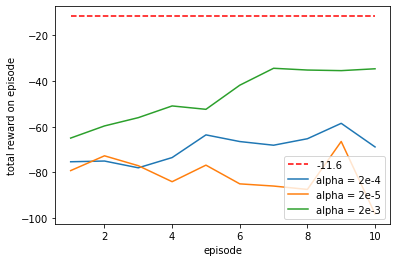

In [ ]:
if __name__ == '__main__':

    num_trials = 100
    num_episodes = 10
    gamma = 1
    #agent_generators = [lambda : ReinforceAgent(alpha=2e-4, gamma=gamma),
    #                    lambda : ReinforceAgent(alpha=2e-5, gamma=gamma),
    #                    lambda : ReinforceAgent(alpha=2e-3, gamma=gamma)]    
    agent_generators = [lambda : ReinforceAgent22(alpha=2e-4, gamma=gamma),
                        lambda : ReinforceAgent22(alpha=2e-5, gamma=gamma),
                        lambda : ReinforceAgent22(alpha=2e-3, gamma=gamma)]
    labels = ['alpha = 2e-4',
              'alpha = 2e-5',
              'alpha = 2e-3']

    rewards = np.zeros((len(agent_generators), num_trials, num_episodes))

    for agent_index, agent_generator in enumerate(agent_generators):
        for i in tqdm(range(num_trials)):
            
            #reward = trial(num_episodes, agent_generator)
            reward = trial2(num_episodes, agent_generator)
            rewards[agent_index, i, :] = reward

    plt.plot(np.arange(num_episodes) + 1, -11.6 * np.ones(num_episodes), ls='dashed', color='red', label='-11.6')
    for i, label in enumerate(labels):
        plt.plot(np.arange(num_episodes) + 1, rewards[i].mean(axis=0), label=label)
    plt.ylabel('total reward on episode')
    plt.xlabel('episode')
    plt.legend(loc='lower right')

    plt.show()
    #plt.savefig('../images/figure_13_1.png')
    plt.close()

In [ ]:
theta = np.array([-1.47, 1.47])
print(theta)
x = np.array([[0, 1],[1, 0]])
print(x)


h = np.dot(theta, x)
print("h:",h)
t = np.exp(h - np.max(h))
print("h - np.max(h):",h - np.max(h))
print("np.exp(h - np.max(h)):",np.exp(h - np.max(h)))
print("t:", t)
pmf = t / np.sum(t)
print("np.sum(t):", np.sum(t))
print("pmf:", pmf)

np.exp(-2.94)


print("-----")


imin = np.argmin(pmf)
print("imin:", imin)
epsilon = 0.05

if pmf[imin] < epsilon:
  pmf[:] = 1 - epsilon
  print("pmf[:]:",pmf[:])
  pmf[imin] = epsilon
print("pmf:",pmf)  

[-1.47  1.47]
[[0 1]
 [1 0]]
h: [ 1.47 -1.47]
h - np.max(h): [ 0.   -2.94]
np.exp(h - np.max(h)): [1.         0.05286573]
t: [1.         0.05286573]
np.sum(t): 1.0528657287383503
pmf: [0.94978873 0.05021127]
-----
imin: 1
pmf: [0.94978873 0.05021127]


In [ ]:
go_right2 = np.random.uniform() <= pmf[1]
print(pmf[0], pmf[1])
print(go_right2)

0.9497887268097336 0.05021127319026654
False


In [ ]:
np.random.uniform()
#np.random.uniform(-1,1,20)

0.08072890429476842

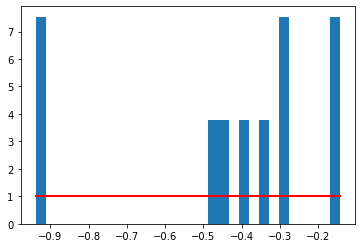

In [ ]:
count, bins, ignored = plt.hist(np.random.uniform(-1,0,10), 30, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [ ]:
0.1/2
1-0.05

0.95